## 1. Imports

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 2. Caminhos utilizados no fluxo

In [17]:
path = '/home/murilo/workspace/tcc/tcc/python_model/database'
input_path = f'{path}/entrada.csv'
output_path = f'{path}/saida.csv'

## 3. Carregando os arquivos

In [18]:
input_data = pd.read_csv(input_path).drop(columns=['Massa'])
output_data = pd.read_csv(output_path)

Os dados da coluna `massa` foram retirados pois não são podem ser coletadas diretamente.  

## 4. Descrição dos dados

In [19]:
data = pd.concat([input_data, output_data], axis=1)
data.head()

,Na,K,Cl
0,6.2,4.8,12.4
1,14.2,17.2,40.0
2,4.8,3.3,9.5
3,5.4,3.4,10.6
4,5.2,4.3,10.7


In [20]:
correlation_data = data.corr()
descriptive_stats_data = data.describe()

print(descriptive_stats_data) 
print(correlation_data)

               Na           K          Cl
count  198.000000  198.000000  198.000000
mean     8.373232    4.481818   16.545960
std      5.748162    2.713077    9.401413
min      0.900000    0.400000    2.000000
25%      4.700000    2.700000   10.325000
50%      6.700000    3.900000   14.100000
75%     10.700000    5.500000   20.300000
max     37.200000   17.200000   65.500000
          Na         K        Cl
Na  1.000000  0.252614  0.943206
K   0.252614  1.000000  0.480499
Cl  0.943206  0.480499  1.000000


## 5. Data View

In [21]:
sns.set_theme(style="whitegrid")

### 5.1. Coeficiente de correlação entre as variáveis não normalizadas

In [22]:
X = data[['Na', 'K']]
y = data['Cl']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

coefficients = model.coef_
intercept = model.intercept_
coefficients, intercept, r_squared

(array([1.43575855, 0.89660382]), 0.5056044002573081, 0.952313573727542)

Para uma análise mais precisa que considera ambos os preditores ("Na" e "K") simultaneamente na previsão de "Cl", podemos usar uma regressão linear múltipla. Isso nos permitirá ver como "Na" e "K", juntos, se correlacionam com "Cl".

A regressão linear múltipla resultou nos seguintes coeficientes e no valor de \( R^2 \):

**Coeficientes:**
- **Na**: 1.436
- **K**: 0.897

**Intercepto**: 0.506

- **R²**: 0.952

**Interpretação:**
- O coeficiente de "Na" (1.436) indica que, mantendo o "K" constante, um aumento de uma unidade em "Na" está associado a um aumento de aproximadamente 1.436 unidades em "Cl".
- O coeficiente de "K" (0.897) sugere que, mantendo "Na" constante, um aumento de uma unidade em "K" está associado a um aumento de aproximadamente 0.897 unidades em "Cl".
- O \( R^2 \) de 0.952 significa que cerca de 95.2% da variação em "Cl" pode ser explicada pelas variáveis de entrada "Na" e "K" juntas. Isso indica uma forte capacidade preditiva do modelo.

Esses resultados mostram que as entradas têm uma relação significativa e conjunta com a saída, e o modelo linear múltiplo é bastante eficaz para explicar a variabilidade de "Cl" com base em "Na" e "K".

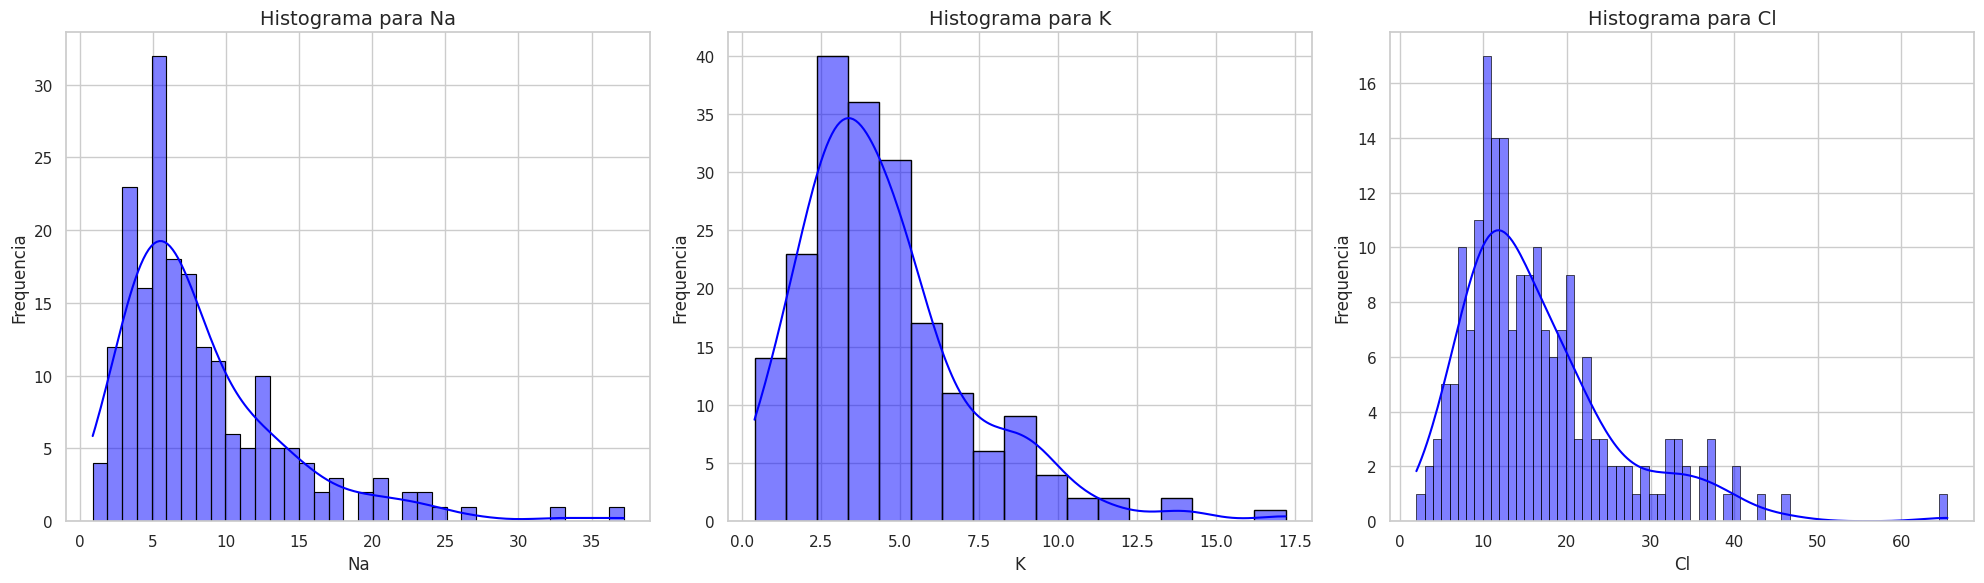

In [23]:
plt.figure(figsize=(20, 6))

for i, column in enumerate(data.columns, 1):
    plt.subplot(1, len(data.columns), i)
    sns.histplot(data[column], kde=True, color='blue', binwidth=1, edgecolor='black')
    plt.title(f'Histograma para {column}', fontsize=14)
    plt.xlabel(f'{column}', fontsize=12)
    plt.ylabel('Frequencia', fontsize=12)

plt.tight_layout()
plt.show()

### 5.2. Coeficiente de correlação entre as variáveis normalizadas

A aplicação de um **Standard Scaler**, que normaliza os dados para terem média zero e desvio padrão unitário, pode ser benéfica em diversos cenários, principalmente em modelos de aprendizado de máquina que são sensíveis à escala das variáveis.

### Vantagens do uso do Standard Scaler:
1. **Eficiência Numérica**: Muitos algoritmos funcionam melhor ou convergem mais rapidamente quando os dados estão em uma escala comum.
2. **Importância Relativa**: Normalizar os dados remove o problema de escalas distintas influenciando mais do que a relevância real daquela variável para o modelo.

### Avaliação para o caso:
- Dado que as magnitudes de "Na" e "K" podem ser bastante diferentes, e ambos têm um impacto significativo na variável de saída "Cl", normalizá-las pode ajudar a obter um modelo mais estável e previsões mais precisas.
- Além disso, a normalização pode ajudar na interpretação dos coeficientes do modelo, já que cada coeficiente refletirá a importância de cada variável em escalas comparáveis.

In [24]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)

Nos dados de treinamento, foi aplicada a $\textbf{Normalização Padrão}$ $\textit{Standard Scaling}$, que é uma técnica comum de pré-processamento para dados de entrada em modelos de aprendizado de máquina. Este método é implementado pela classe $\texttt{StandardScaler}$ da biblioteca $\texttt{sklearn.preprocessing}$:

- Centraliza a Média: Subtrai a média de cada característica, de modo que a média ajustada seja 0.
- Escala pela Variância: Divide cada característica pelo desvio padrão, resultando em uma variância de 1.

A fórmula matemática para a normalização padrão de uma característica $x$ é:

$z = \frac{x - \mu}{\sigma}$

onde $\mu$ é a média e $\sigma$ é o desvio padrão da característica.

Este tipo de normalização é especialmente útil quando as características têm diferentes unidades de medida ou quando há grandes diferenças nas escalas das características, pois coloca todas as características na mesma escala, facilitando o aprendizado e a convergência do modelo.

In [25]:
mean = scaler.mean_
var = scaler.var_
scale = scaler.scale_

print('Sódio: ', f'média = {mean[0]}/', f'escala = {scale[0]}')
print('Potássio: ', f'média = {mean[1]}/', f'escala = {scale[1]}')
print('Cloro: ', f'média = {mean[2]}/', f'escala = {scale[2]}')

Sódio:  média = 8.373232323232324/ escala = 5.733627604900975
Potássio:  média = 4.481818181818182/ escala = 2.7062166977954663
Cloro:  média = 16.545959595959598/ escala = 9.37764151814367


de forma que:

- X_new_scaled = (X_new - X_mean) / X_scale
- Y_pred_original_scale = Y_pred_scaled * Y_scale + Y_mean

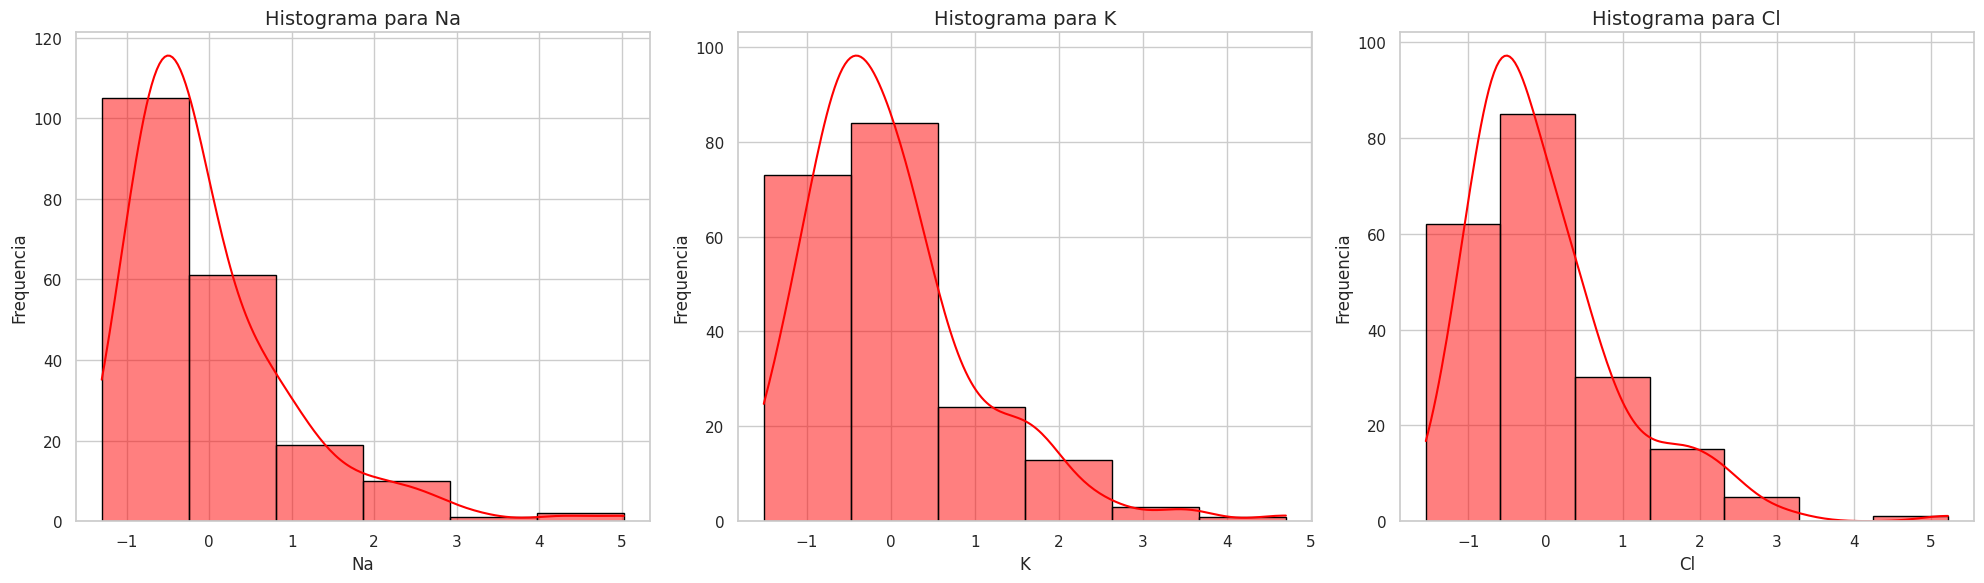

In [26]:
plt.figure(figsize=(20, 6))

for i, column in enumerate(data_scaled.columns, 1):
    plt.subplot(1, len(data_scaled.columns), i)
    sns.histplot(data_scaled[column], kde=True, color='red', binwidth=1, edgecolor='black')
    plt.title(f'Histograma para {column}', fontsize=14)
    plt.xlabel(f'{column}', fontsize=12)
    plt.ylabel('Frequencia', fontsize=12)

plt.tight_layout()
plt.show()

In [27]:
X = data_scaled[['Na', 'K']]
y = data_scaled['Cl']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

coefficients = model.coef_
intercept = model.intercept_
coefficients, intercept, r_squared

(array([0.87784384, 0.25874355]), -4.26527108043225e-17, 0.952313573727542)

### Avaliação dos Resultados:

**Coeficientes**:
  - **Na**: Aproximadamente 0.877
  - **K**: Aproximadamente 0.258

**Intercepto**: Aproximadamente 0
**R²**: Aproximadamente 0.952

**Análise**:
1. **Coeficientes**: Os valores indicam que um aumento de uma unidade padrão em "Na" está associado a um aumento de aproximadamente 0.877 unidades em "Cl", enquanto um aumento de uma unidade padrão em "K" está associado a um aumento de aproximadamente 0.258 unidades em "Cl". "Na" tem um impacto maior em "Cl" do que "K", quando considerado na mesma escala.
   
2. **Intercepto**: A presença de um intercepto tão pequeno e próximo de zero confirma que o modelo está se comportando como esperado após a normalização dos dados. A interpretação prática é que não há um viés sistemático introduzido pelo intercepto no modelo, e as previsões são puramente influenciadas pelas variações de "Na" e "K" em relação às suas médias. Isso ajuda a garantir que as interpretações dos coeficientes sejam diretas e baseadas apenas nas alterações das variáveis de entrada.
   
3. **R²**: O valor de 0.952 é muito alto, indicando que o modelo explica cerca de 95.2% da variabilidade na variável dependente "Cl" com base nas variáveis preditoras. Isso sugere um excelente ajuste do modelo aos dados.

## 6. Base para treino e teste

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
x_train.to_csv(f'{path}/x_train.csv', index=False)
x_test.to_csv(f'{path}/x_test.csv', index=False)
y_train.to_csv(f'{path}/y_train.csv', index=False)
y_test.to_csv(f'{path}/y_test.csv', index=False) 